Hypothesis Testing
==================

Why do we need it for an AI project?
------------------------------------

Helps answer:

-   Is the model better than random?
-   Is the difference between variables significant? Is it real?
-   Is the correlation strong enough?
-   Are two datasets (e.g. training and test) similar?
-   Is the training data representative of the whole population?

Null hypothesis and p-values 
----------------------------

-   Null hypothesis: there is no difference between two (or more)
    variables or groups
-   p-value: the probability that the null hypothesis is true

Comparing variables in the Framingham dataset
---------------------------------------------

Begin by loading the Framingham dataset.


In [1]:
!gdown --id 1OnIYNtdVIVIgrxdDkL3L0chpG8DpWTjz


Downloading...
From: https://drive.google.com/uc?id=1OnIYNtdVIVIgrxdDkL3L0chpG8DpWTjz
To: /content/fram.txt
100% 1.46M/1.46M [00:00<00:00, 96.0MB/s]


In [2]:
 %matplotlib inline
 !pip install pingouin


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from scipy.stats import mstats
from statsmodels.stats.multitest import fdrcorrection, multipletests
import statsmodels.api as sm
import pingouin as pg
from sklearn.model_selection import train_test_split
from statsmodels.discrete.discrete_model import MNLogit
from statsmodels.tools.tools import add_constant


In [5]:
fram = pd.read_csv("fram.txt", delimiter=",")

Create a boxplot to compare BMI betwen males and females.

Text(0.5, 1.0, 'Sex vs BMI')

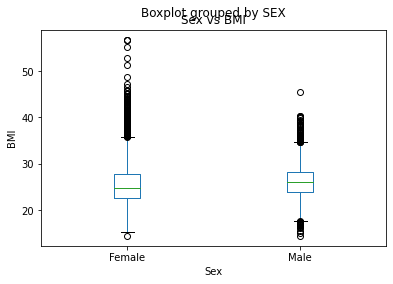

In [6]:
pd.concat([fram.BMI,fram.SEX.replace(1, "Male").replace(2, "Female")], axis=1).boxplot(by="SEX",grid=False)
plt.xlabel("Sex")
plt.ylabel("BMI")
plt.title("Sex vs BMI")


Is the difference in BMI between males and females significant
statistically?

We can check the significance using a **t-test**. In MATLAB, this is done
with the ttest2 function. The t-test checks if the two distributions (in
this case BMI of males and females) have equal means.

The first output, h, signifies whether the test rejects or fails to
reject the null hypothesis. A value of 1 indicates that the null
hypothesis is rejected at a significance level of 5%, and a value of 0
indicates that we fail to reject the null hypothesis.

The second output of `scipy.stats.ttest_ind` will be the p-value.


In [7]:
sample1 = fram.BMI[fram.SEX==1].reset_index()["BMI"].dropna().to_numpy()
sample2 = fram.BMI[fram.SEX==2].reset_index()["BMI"].dropna().to_numpy()

tstat, p_value = stats.ttest_ind(sample1, sample2)
h0 = p_value<0.05
tstat, p_value, h0

(7.488797300858497, 7.455656513288104e-14, True)

Based on the value of h, we can reject the null hypothesis. What does
the p-value say about the two distributions?

If the null hypothesis is true and there is no relationship between sex
and BMI, the probability of getting results as extreme as ours is

T-test assumptions 
------------------

-   T-test assumes that distributions are "normal".
-   T-test compares the mean and not the median.

How do we know if the data is "normal"? 
---------------------------------------

Plot it! Use histogram to plot BMI, cholesterol and glucose for males
and females.


Text(0.5, 1.0, 'Females')

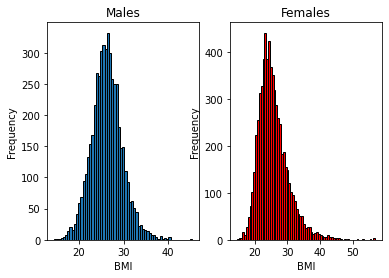

In [8]:
plt.subplot(1,2,1)
a = fram.BMI[fram.SEX==1].dropna().to_numpy()
bins = np.histogram_bin_edges(a, bins="auto")
plt.hist(a, edgecolor='black',bins=bins)
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('Males')
plt.subplot(1,2,2)
a = fram.BMI[fram.SEX==2].dropna().to_numpy()
bins = np.histogram_bin_edges(a, bins="auto")
plt.hist(a, edgecolor='black', color="r", bins=bins)
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('Females')


Text(0.5, 1.0, 'Females')

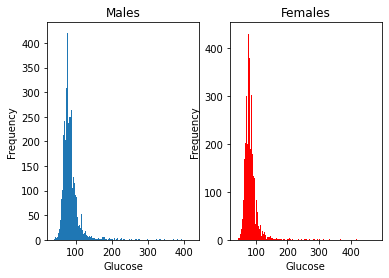

In [9]:
plt.subplot(1,2,1)
a = fram.GLUCOSE[fram.SEX==1].dropna().to_numpy()
bins = np.histogram_bin_edges(a, bins="auto")
plt.hist(a, edgecolor='none',bins=bins)
plt.xlabel('Glucose')
plt.ylabel('Frequency')
plt.title('Males')
plt.subplot(1,2,2)
a = fram.GLUCOSE[fram.SEX==2].dropna().to_numpy()
bins = np.histogram_bin_edges(a, bins="auto")
plt.hist(a, edgecolor='none', color="r", bins=bins)
plt.xlabel('Glucose')
plt.ylabel('Frequency')
plt.title('Females')


Text(0.5, 1.0, 'Females')

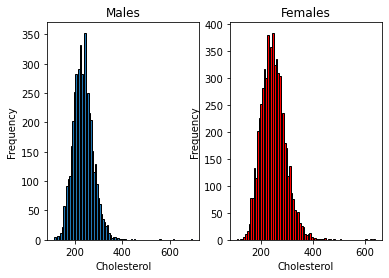

In [10]:
plt.subplot(1,2,1)
a = fram.TOTCHOL[fram.SEX==1].dropna().to_numpy()
bins = np.histogram_bin_edges(a, bins="auto")
plt.hist(a, edgecolor='black',bins=bins)
plt.xlabel('Cholesterol')
plt.ylabel('Frequency')
plt.title('Males')
plt.subplot(1,2,2)
a = fram.TOTCHOL[fram.SEX==2].dropna().to_numpy()
bins = np.histogram_bin_edges(a, bins="auto")
plt.hist(a, edgecolor='black', color="r", bins=bins)
plt.xlabel('Cholesterol')
plt.ylabel('Frequency')
plt.title('Females')

Are the data normally distributed? They look to be fairly normal, but the right tails in all of the plots look a bit longer than the left tails. To get a better idea about the data normality, we can use normplot. This function compares the input distribution to an ideal normal distribution.


Text(0.5, 1.0, 'BMI: Male')

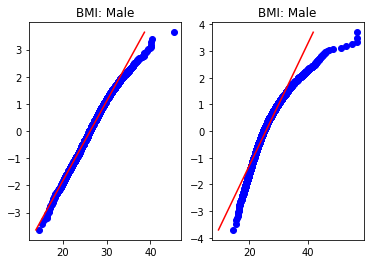

In [11]:

plt.subplot(1,2,1)
data1 = fram.BMI[fram.SEX==1].dropna().to_numpy()
(quantiles, values), (slope, intercept, r) = stats.probplot(data1, dist='norm')
plt.plot(values, quantiles,'ob')
plt.plot(quantiles * slope + intercept, quantiles, 'r')
plt.title('BMI: Male')

plt.subplot(1,2,2)
data2 = fram.BMI[fram.SEX==2].dropna().to_numpy()
(quantiles, values), (slope, intercept, r) = stats.probplot(data2, dist='norm')
plt.plot(values, quantiles,'ob')
plt.plot(quantiles * slope + intercept, quantiles, 'r')
plt.title('BMI: Male')



Text(0.5, 1.0, 'Glucose: Female')

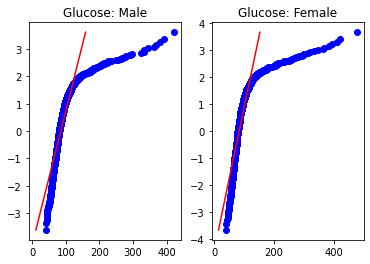

In [12]:

plt.subplot(1,2,1)
data1 = fram.GLUCOSE[fram.SEX==1].dropna().to_numpy()
(quantiles, values), (slope, intercept, r) = stats.probplot(data1, dist='norm')
plt.plot(values, quantiles,'ob')
plt.plot(quantiles * slope + intercept, quantiles, 'r')
plt.title('Glucose: Male')

plt.subplot(1,2,2)
data2 = fram.GLUCOSE[fram.SEX==2].dropna().to_numpy()
(quantiles, values), (slope, intercept, r) = stats.probplot(data2, dist='norm')
plt.plot(values, quantiles,'ob')
plt.plot(quantiles * slope + intercept, quantiles, 'r')
plt.title('Glucose: Female')

Text(0.5, 1.0, 'Cholesterol: Female')

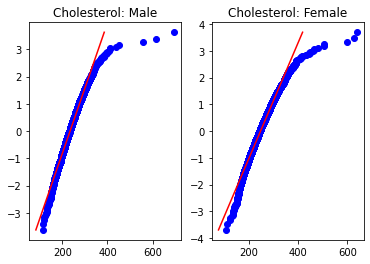

In [13]:

plt.subplot(1,2,1)
data1 = fram.TOTCHOL[fram.SEX==1].dropna().to_numpy()
(quantiles, values), (slope, intercept, r) = stats.probplot(data1, dist='norm')
plt.plot(values, quantiles,'ob')
plt.plot(quantiles * slope + intercept, quantiles, 'r')
plt.title('Cholesterol: Male')

plt.subplot(1,2,2)
data2 = fram.TOTCHOL[fram.SEX==2].dropna().to_numpy()
(quantiles, values), (slope, intercept, r) = stats.probplot(data2, dist='norm')
plt.plot(values, quantiles,'ob')
plt.plot(quantiles * slope + intercept, quantiles, 'r')
plt.title('Cholesterol: Female')

The normality tests confirm that the data is right-skewed in all six cases.

Rank sum test
The **rank sum test** can be used to compare medians for any distribution (not necessarily 'normal')
Compare BMI between males and females using the `ranksum` function. Note that the outputs are in the reverse order compared to the `ttest_ind` function. 

In [14]:
sample1 = fram.BMI[fram.SEX==1].reset_index()["BMI"].dropna().to_numpy()
sample2 = fram.BMI[fram.SEX==2].reset_index()["BMI"].dropna().to_numpy()

tstat, p_value = stats.ranksums(sample1, sample2)
h0 = p_value<0.05
tstat, p_value, h0

(14.012210374874698, 1.3125528090418356e-44, True)

Are these results consistent with those from the t-test?

With the rank sum test, the null hypothesis is that the two samples are from distributions with equal medians. As with the `ttest_ind` function, an output of $h_0 = 1$ means that the null hypothesis is rejected. 

## Interpreting p-values
P-values alone can be misleading; always use it in conjunction with a plot and other statistical metrics (e.g. fold change)
Plot the distribution between males and females for features 3 through 14 using `boxplot` and `subplot`.

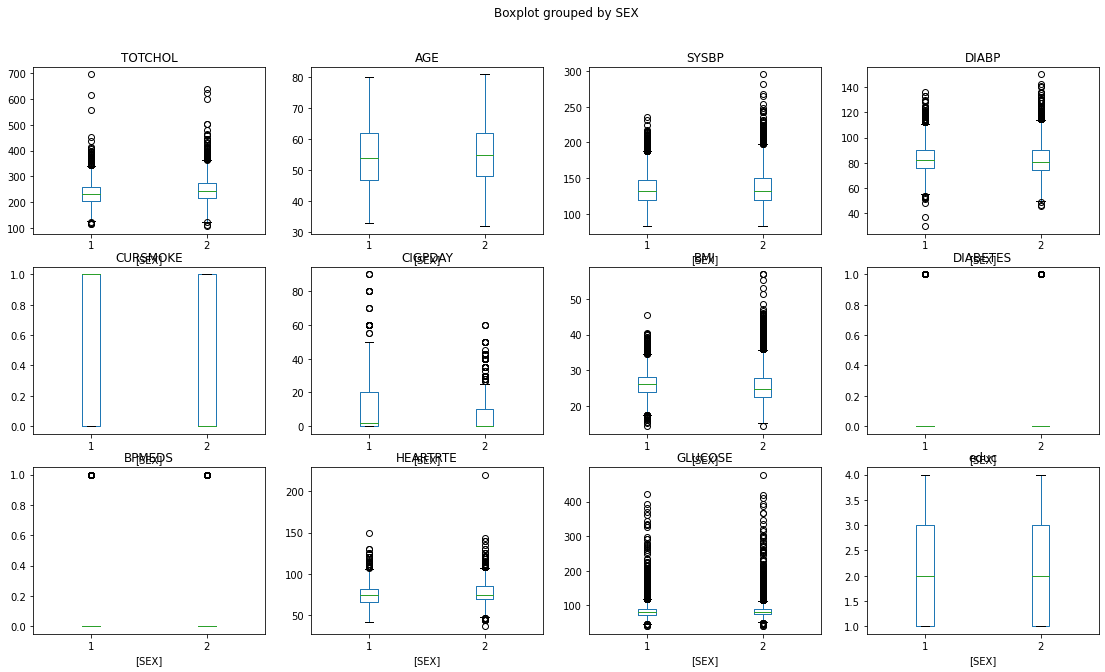

In [15]:
fig, axs = plt.subplots(3, 4)
fig.set_size_inches(18.5, 10.5)
for i,column in enumerate(fram.columns[2:14]):
    
    c = i % 4 
    r = i // 4
    pd.concat([fram[column], fram.SEX], axis=1).dropna().boxplot(by="SEX",grid=False, ax=axs[r,c])
    plt.title(column)

By looking at the boxplots, can you guess if the p-values will be less than 0.05?

Calculate the p-values using both `t-test` and `ranksum` test.

In [16]:
# Create empty matrices to store h and p-values
h_ttest = np.zeros(12)
p_ttest = np.zeros(12)
tstat_ttest = np.zeros(12)
p_rank = np.zeros(12)
h_rank = np.zeros(12)
tstat_rank = np.zeros(12)
# use for loop to perform t-test and ranksum test for each feature
for i, column in enumerate(fram.columns[2:14]):
  sample1 = fram[column][fram.SEX==1].reset_index()[column].dropna().to_numpy()
  sample2 = fram[column][fram.SEX==2].reset_index()[column].dropna().to_numpy()
  tstat_t, p_value_t = stats.ttest_ind(sample1, sample2)
  tstat_r, p_value_r = stats.ranksums(sample1, sample2)
  h0_r = p_value_r<0.05 
  h0_t = p_value_t<0.05 
  h_ttest[i] = h0_t
  p_ttest[i] = p_value_t
  tstat_ttest[i] = tstat_t
  p_rank[i] = p_value_r
  h_rank[i] = h0_r
  tstat_rank[i] = tstat_r

In [17]:
# Create table with h and p-values for two test types
t = pd.DataFrame({'h_ttest': h_ttest, 'p_ttest': p_ttest, 'tstat_ttest': tstat_ttest, 'p_rank': p_rank, 'h_rank': h_rank, 'tstat_rank': tstat_rank}, index=fram.columns[2:14])
t

,h_ttest,p_ttest,tstat_ttest,p_rank,h_rank,tstat_rank
TOTCHOL,1.0,4.605929e-46,-14.313145,9.503195e-44,1.0,-13.870933
AGE,1.0,3.266144e-03,-2.942122,3.632200e-03,1.0,-2.908455
SYSBP,1.0,2.459353e-07,-5.163839,4.148796e-03,1.0,-2.866621
DIABP,1.0,1.266147e-07,5.286967,2.997146e-10,1.0,6.298926
CURSMOKE,1.0,8.134516e-58,16.117399,1.355261e-42,1.0,13.679010
CIGPDAY,1.0,2.092535e-154,26.878327,3.799488e-88,1.0,19.903438
BMI,1.0,7.455657e-14,7.488797,1.312553e-44,1.0,14.012210
DIABETES,1.0,3.066707e-02,2.161630,4.349132e-01,0.0,0.780812
BPMEDS,1.0,1.808946e-18,-8.784104,2.225781e-05,1.0,-4.240948
HEARTRTE,1.0,1.998640e-28,-11.087693,6.781873e-29,1.0,-11.154835


According to both tests, only Glucose and Education do not meet the threshold p-value of 0.05. Therefore, we fail to reject the null hypothesis for those two variables.

Repeat the same process, this time comparing smokers and non-smokers.

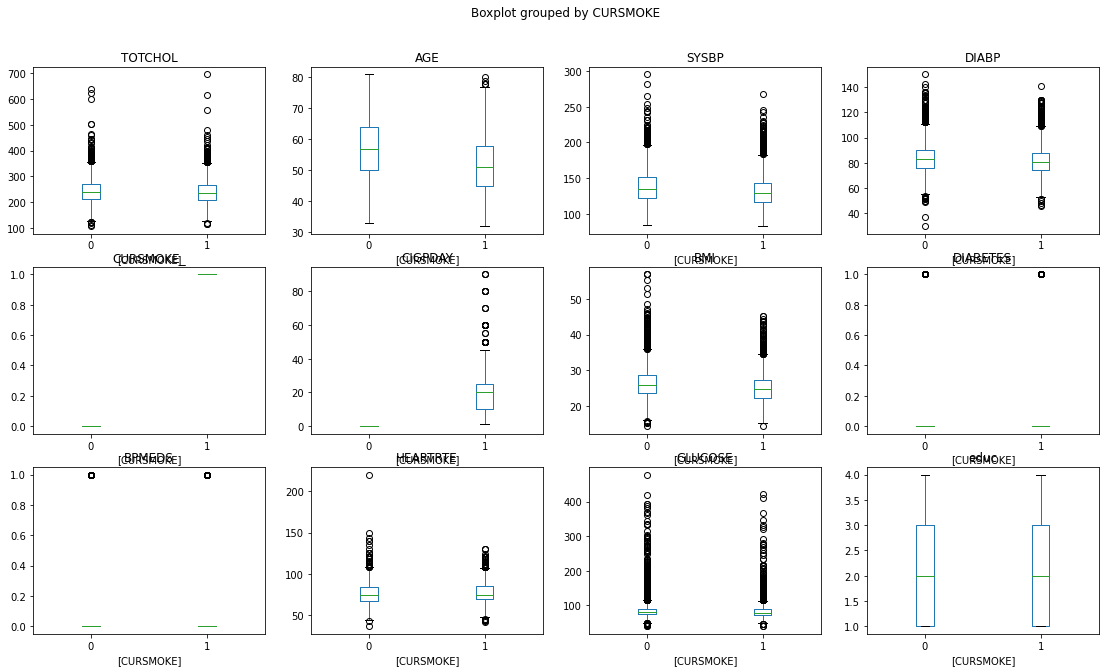

In [18]:
fig, axs = plt.subplots(3, 4)
fig.set_size_inches(18.5, 10.5)
h_ttest = np.zeros(12)
p_ttest = np.zeros(12)
tstat_ttest = np.zeros(12)
p_rank = np.zeros(12)
h_rank = np.zeros(12)
tstat_rank = np.zeros(12)
for i,column in enumerate(fram.columns[2:14]):    
  c = i % 4 
  r = i // 4
  if column == "CURSMOKE":
    pd.concat([fram[column].rename("CURSMOKE_"), fram.CURSMOKE], axis=1).dropna().boxplot(by="CURSMOKE",grid=False, ax=axs[r,c])
  else:
    pd.concat([fram[column], fram.CURSMOKE], axis=1).dropna().boxplot(by="CURSMOKE",grid=False, ax=axs[r,c])

  plt.title(column)

  sample1 = fram[column][fram.CURSMOKE==0].reset_index()[column].dropna().to_numpy()
  sample2 = fram[column][fram.CURSMOKE==1].reset_index()[column].dropna().to_numpy()
  tstat_t, p_value_t = stats.ttest_ind(sample1, sample2)
  tstat_r, p_value_r = stats.ranksums(sample1, sample2)
  h0_r = p_value_r<0.05 
  h0_t = p_value_t<0.05 
  h_ttest[i] = h0_t
  p_ttest[i] = p_value_t
  tstat_ttest[i] = tstat_t
  p_rank[i] = p_value_r
  h_rank[i] = h0_r
  tstat_rank[i] = tstat_r

In [19]:
t = pd.DataFrame({'h_ttest': h_ttest, 'p_ttest': p_ttest, 'tstat_ttest': tstat_ttest, 'p_rank': p_rank, 'h_rank': h_rank, 'tstat_rank': tstat_rank}, index=fram.columns[2:14])
t

,h_ttest,p_ttest,tstat_ttest,p_rank,h_rank,tstat_rank
TOTCHOL,1.0,1.007933e-05,4.417483,2.507464e-06,1.0,4.707522
AGE,1.0,8.979214e-169,28.154513,2.795973e-163,1.0,27.230927
SYSBP,1.0,1.586710e-52,15.329366,2.311058e-57,1.0,15.963063
DIABP,1.0,2.447360e-16,8.209884,2.512460e-19,1.0,8.988229
CURSMOKE,1.0,0.000000e+00,-inf,0.000000e+00,1.0,-92.524147
CIGPDAY,1.0,0.000000e+00,-134.652068,0.000000e+00,1.0,-92.107966
BMI,1.0,1.237422e-71,18.022267,3.267311e-74,1.0,18.225024
DIABETES,1.0,2.731998e-06,4.692324,9.032749e-02,0.0,1.693673
BPMEDS,1.0,1.243678e-19,9.082322,1.165866e-05,1.0,4.383875
HEARTRTE,1.0,9.137713e-12,-6.826446,9.142916e-14,1.0,-7.452729


In this case, we reject the null hypothesis for all variables except Education.



## Comparing multiple distributions using ANOVA

Compare BMI, smoking and diabetes based on education level using boxplots.

Text(0, 0.5, 'BMI')

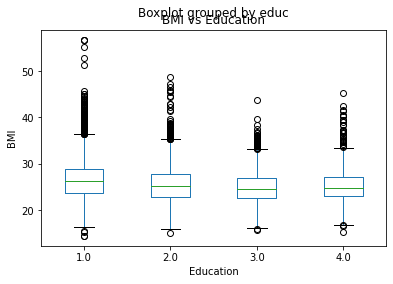

In [20]:
pd.concat([fram["BMI"], fram.educ], axis=1).dropna().boxplot(by="educ",grid=False)
plt.title('BMI vs Education')
plt.xlabel('Education')
plt.ylabel('BMI')

Text(0, 0.5, 'Cigarettes per Day')

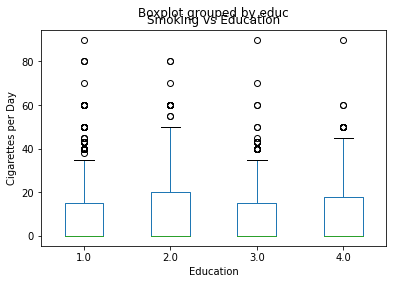

In [21]:
pd.concat([fram["CIGPDAY"], fram.educ], axis=1).dropna().boxplot(by="educ",grid=False)
plt.title('Smoking vs Education')
plt.xlabel('Education')
plt.ylabel('Cigarettes per Day')

Text(0, 0.5, 'Diabetes Status')

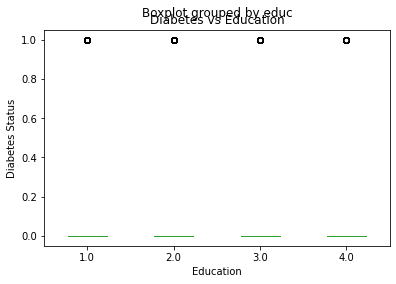

In [22]:
pd.concat([fram["DIABETES"], fram.educ], axis=1).dropna().boxplot(by="educ",grid=False)
plt.title('Diabetes vs Education')
plt.xlabel('Education')
plt.ylabel('Diabetes Status')

Another useful tool for comparing groups within a dataset is the `apply` function. It allows you to split a dataset into groups and apply any function of your choice to each group. It helps to define the groups beforehand using the `groupby` function. 

Find the mean for each education group within the BMI, Cigarettes per Day and Diabetes Status datasets. Because we have not removed rows with missing data, the `mean` function will be needed.

In [23]:
pd.concat([fram["BMI"], fram.educ], axis=1).dropna().groupby("educ").apply(lambda x: x.mean())["BMI"]

educ
1.0    26.603092
2.0    25.541644
3.0    24.962661
4.0    25.274698
Name: BMI, dtype: float64

In [24]:
pd.concat([fram["CIGPDAY"], fram.educ], axis=1).dropna().groupby("educ").apply(lambda x: x.mean())["CIGPDAY"]

educ
1.0    7.778351
2.0    9.556440
3.0    7.056684
4.0    8.503361
Name: CIGPDAY, dtype: float64

In [25]:
pd.concat([fram["DIABETES"], fram.educ], axis=1).dropna().groupby("educ").apply(lambda x: x.mean())["DIABETES"]

educ
1.0    0.057143
2.0    0.034897
3.0    0.038196
4.0    0.043059
Name: DIABETES, dtype: float64

Are the differences between education levels significant for these three variables? We can use the **ANOVA** test to calculate the p-value.

**ANOVA** extends the t-test to multiple comparisons (also assumes the distributions are 'normal' and it compares the mean).

In [26]:
df = pd.concat([fram.BMI, fram.educ], axis=1).dropna()
result = pg.anova(data=df, dv="BMI", between="educ")
result

,Source,ddof1,ddof2,F,p-unc,np2
0,educ,3,11278,99.644836,1.169771e-63,0.025822


In [27]:
df = pd.concat([fram.CIGPDAY, fram.educ], axis=1).dropna()
result = pg.anova(data=df, dv="CIGPDAY", between="educ")
result

,Source,ddof1,ddof2,F,p-unc,np2
0,educ,3,11254,21.506535,6.948755e-14,0.0057


In [28]:
df = pd.concat([fram.DIABETES, fram.educ], axis=1).dropna()
result = pg.anova(data=df, dv="DIABETES", between="educ")
result

,Source,ddof1,ddof2,F,p-unc,np2
0,educ,3,11328,8.648374,0.00001,0.002285


Based on the p-values, we can infer that the means of each educational group are statistically different in regards to BMI, Cigarettes per Day and Diabetes.



The **Kruskal-Wallis test** is the equivalent of the rank-sum test for multiple comparisons. First calculate the median of each education group for BMI, Cigarettes per Day, and Diabetes.

In [29]:
pd.concat([fram["BMI"], fram.educ], axis=1).dropna().groupby("educ").apply(lambda x: x.median())["BMI"]

educ
1.0    26.27
2.0    25.13
3.0    24.59
4.0    24.88
Name: BMI, dtype: float64

In [30]:
pd.concat([fram["CIGPDAY"], fram.educ], axis=1).dropna().groupby("educ").apply(lambda x: x.median())["CIGPDAY"]

educ
1.0    0.0
2.0    0.0
3.0    0.0
4.0    0.0
Name: CIGPDAY, dtype: float64

In [31]:
pd.concat([fram["DIABETES"], fram.educ], axis=1).dropna().groupby("educ").apply(lambda x: x.median())["DIABETES"]

educ
1.0    0.0
2.0    0.0
3.0    0.0
4.0    0.0
Name: DIABETES, dtype: float64

Now use the `scipy.stats.kruskal` function to find the corresponding p-values.


In [32]:
df = pd.concat([fram.BMI, fram.educ], axis=1).dropna()
x1 = df["BMI"].to_numpy()
x2 = df["educ"].to_numpy()
result = stats.kruskal(x1,x2)
result.pvalue

0.0

In [33]:
df = pd.concat([fram.CIGPDAY, fram.educ], axis=1).dropna()
x1 = df["CIGPDAY"].to_numpy()
x2 = df["educ"].to_numpy()
result = stats.kruskal(x1,x2)
result.pvalue

1.3602432482174179e-122

In [34]:
df = pd.concat([fram.DIABETES, fram.educ], axis=1).dropna()
x1 = df["DIABETES"].to_numpy()
x2 = df["educ"].to_numpy()
result = stats.kruskal(x1,x2)
result.pvalue

0.0

Despite the median values being zero for all education groups within the Cigarettes per Day and Diabetes data sets, the p-values are still well below the 0.05 threshold. As previously mentioned, p-values alone can be very misleading. The larger the sample size, the greater the impact of small differences in the mean or median. 

Repeat the median and p-value calculations (using the Kruskal-Wallis test), but this time using only the first 100 patients.

In [35]:
# Create grouping array for first 100 patients 
pd.concat([fram["BMI"], fram.educ], axis=1).dropna()[:100].groupby("educ").apply(lambda x: x.median())["BMI"]

educ
1.0    26.610
2.0    26.185
3.0    24.310
4.0    27.715
Name: BMI, dtype: float64

In [36]:
pd.concat([fram["CIGPDAY"], fram.educ], axis=1).dropna()[:100].groupby("educ").apply(lambda x: x.median())["CIGPDAY"]

educ
1.0     0.0
2.0     9.0
3.0    10.0
4.0    35.0
Name: CIGPDAY, dtype: float64

In [37]:
pd.concat([fram["DIABETES"], fram.educ], axis=1).dropna()[:100].groupby("educ").apply(lambda x: x.median())["DIABETES"]

educ
1.0    0.0
2.0    0.0
3.0    0.0
4.0    0.0
Name: DIABETES, dtype: float64

In [38]:
df = pd.concat([fram["BMI"], fram.educ], axis=1).dropna()[:100]

a = []
groups = df.groupby("educ").groups
for key in groups:
  a.append(df.loc[groups[key]]["BMI"].to_numpy())
result = mstats.kruskalwallis(*a)
result.pvalue

0.13401770937264137

In [39]:
df = pd.concat([fram["CIGPDAY"], fram.educ], axis=1).dropna()[:100]
a = []
groups = df.groupby("educ").groups
for key in groups:
  # print(key)
  a.append(df.loc[groups[key]]["CIGPDAY"].to_numpy())
result = mstats.kruskalwallis(*a)
result.pvalue

0.0010765348009767078

In [40]:
df = pd.concat([fram["DIABETES"], fram.educ], axis=1).dropna()[:100]
a = []
groups = df.groupby("educ").groups
for key in groups:
  a.append(df.loc[groups[key]]["DIABETES"].to_numpy())
result = mstats.kruskalwallis(*a)
result.pvalue

0.0597511334827138

Not only did some of the median values change drastically, especially in the Cigarettes per Day data set, but now we fail to reject the null hypothesis for the BMI and Diabetes tests. 

Multiple hypothesis testing 
---------------------------

-   When analyzing big data sets, we usually (knowingly or unknowingly)
    test for multiple hypotheses.
-   Every time we test a hypothesis, there is a small but finite
    probability that the results may be significant due to random
    chance. This is quantified by the p-value.
-   If we test multiple hypotheses, then it is likely that some of the
    hypotheses with significant p-values may be false positives.
-   Multiple hypothesis correction helps to avoid such false
    discoveries.
-   This is a signficant problem in big data analysis.

Hypothesis: Males and females have different BMI

-   A p-value of 0.05 implies that there is only a 5% chance that the
    difference between two variables is due to random coincidence.
-   Multiple hypothesis scenario 1: If the Framingham experiment was
    repeated 100 times, in 5 trials you may find significant difference.
-   Multiple hypothesis scenario 2: Males and females have different
    properties.
-   Some comparisons may have low p-values out of random chance.

Multiple hypothesis correction
------------------------------

-   Bonferroni Correction - divide the p-values by the number of trials.
-   For example, for a single hypothesis, a p-value cutoff of 0.05 is
    usually used. If you test 100 hypotheses, then the equivalent
    p-value theshold for significance should be 0.05 / 100 = 0.0005 to
    correct for multiple hypotheses using the Bonferroni approach.
-   The Bonferroni approach is very conservative.

Multiple hypothesis correction using FDR
----------------------------------------

-   Benjamin Hochberg correction - False discovery rate (FDR) is
    designed to control the proportion of false positives among the set
    of rejected hypotheses.
-   This approach provides a p-value for the p-value (called the
    q-value). It tells you how many false discoveries (false positives)
    will occur with a p-value threshold.
-   A q-value of 0.05 for a given p-value means that 5% of hypotheses
    with the same p-value are likely false positives.

Correcting for multiple hypotheses in transcriptomics data
----------------------------------------------------------

-   Transcriptomics - the activity of close to 30,000 gene transcripts
    are measured
-   Scientists routinely compare transcriptome of normal and cancer
    patients to find biomarkers for cancer diagnosis.
-   With a p-value of 0.05, we would expect to see 30,000 x 0.05 = 1,500
    genes to be statistically significant by random chance!

Testing if a gene is differentially active in normal and cancer patients 
------------------------------------------------------------------------

Start by loading the cancer transcriptomics data and looking at the
first five rows using the `head` function.

In [41]:
!gdown --id 1GhJKx9Evs9rBB9qjzzpR9S3M-BEW4XSc

Downloading...
From: https://drive.google.com/uc?id=1GhJKx9Evs9rBB9qjzzpR9S3M-BEW4XSc
To: /content/cancer_RNAseq_rev.xlsx
100% 345k/345k [00:00<00:00, 44.7MB/s]


In [42]:
data = pd.read_excel("cancer_RNAseq_rev.xlsx")
data.head(5)

,Patient,Class,MUC6,SPAG17,CCL20,ADCY2,TP63,SOX2,C20orf151,ABCA12,FCAMR,CCNO,VSIG2,PKP1,TMEM174,SAA1,MSLN,COL4A3,HABP2,ACPP,BMP5,AGXT2,PTPRT,TM4SF4,C11orf9,ARSE,B3GNT3,SFN,TRIM31,CP,DMGDH,CTNND2,EPB41L4B,MYEOV,BBOX1,RLN1,ORM1,HS6ST3,SLC34A2,POF1B,...,CYP2B7P1,GRIK3,CDX1,HNF1B,PI15,ELFN2,NR1H4,TEX15,CLIC6,C9orf71,ERN2,DIRAS2,PPAN_P2RY11,PIGR,MUC21,KCNJ15,HOXA9,CYP4Z1,HSD17B2,TMEM195,SCGB2A2,ELF5,EREG,CXCL3,CHP2,C4BPB,SEMA5B,MT1G,NDUFA4L2,LYPD6B,SI,BPIL1,LRP1B,CAPN13,CHAD,SPINK4,OR51E1,HOXB8,CHST8,ACSM5
0,Patient-7,BRCA,1.474202,6.657323,4.175620,3.453939,4.964875,6.165397,7.324910,4.361824,2.955573,2.887857,0.000000,5.013337,0.0,9.163894,0.775093,2.187926,1.647959,5.206358,0.000000,0.000000,8.074227,0.000000,5.351657,2.491468,4.203741,9.672767,1.276556,9.182876,2.955573,8.563559,8.008003,3.749298,0.000000,2.579928,6.214591,6.501820,0.000000,4.548806,...,12.370764,8.696888,2.816825,0.000000,11.584648,1.943059,0.000000,1.276556,5.855594,0.0,0.000000,0.775093,5.291880,9.815055,0.000000,2.955573,3.198494,3.253324,0.000000,1.943059,3.894372,8.157448,0.000000,0.000000,0.0,2.955573,3.670897,2.296369,7.215242,9.258243,0.000000,0.000000,11.433497,9.347588,7.215242,3.859443,5.300497,1.803062,6.200706,4.361824
1,Patient-14,BRCA,1.168642,1.967943,0.873420,2.246134,0.501821,1.168642,9.297340,0.000000,0.000000,2.479282,2.113734,3.457384,0.0,9.188398,0.873420,1.168642,2.246134,3.796650,2.113734,2.936647,0.501821,0.000000,6.374262,4.071128,5.670217,11.661974,0.000000,1.963326,3.220376,9.340567,8.571400,11.413845,0.873420,1.413648,0.000000,6.834863,1.805746,4.971277,...,10.865091,5.167735,4.418514,1.622977,3.154502,4.809471,0.501821,0.000000,4.331763,0.0,0.000000,0.501821,0.000000,0.000000,0.501821,3.752802,4.602700,2.936647,0.000000,1.622977,0.000000,1.413648,0.501821,0.873420,0.0,0.000000,5.009043,5.248895,8.764556,9.864900,0.501821,3.660894,0.000000,8.619501,0.501821,0.000000,5.295484,4.526626,7.971693,4.552432
2,Patient-18,BRCA,0.786596,3.954131,3.569795,4.172864,3.525067,0.000000,4.618321,9.634517,0.000000,5.762482,3.044342,3.277925,0.0,1.061707,0.000000,2.091632,0.786596,6.017855,0.000000,0.000000,3.222975,0.000000,5.917604,5.147140,4.871533,8.485459,1.061707,7.002399,5.652421,8.812992,5.993439,6.847771,0.000000,3.569795,3.526883,10.655173,4.284410,9.450937,...,9.313042,3.954131,2.514072,0.000000,6.584519,0.786596,0.000000,0.446256,5.985207,0.0,0.000000,2.318259,5.658851,4.924152,1.061707,5.147140,5.147140,8.377957,1.292723,0.000000,4.437061,3.696205,0.446256,1.061707,0.0,0.000000,2.765471,3.696205,5.864738,5.353080,0.000000,0.000000,2.318259,8.146564,5.683278,1.061707,5.960224,4.020084,4.172864,2.686433
3,Patient-28,BRCA,0.000000,5.108679,1.094709,3.161888,5.809474,6.203319,7.717951,8.513988,0.000000,3.334239,0.000000,9.714754,0.0,5.407818,1.094709,2.139862,3.488194,5.200657,0.000000,0.000000,8.208083,0.648834,5.222766,6.310424,0.648834,9.305877,0.648834,10.571061,3.978589,9.180446,10.150661,1.434882,2.739546,0.000000,0.000000,10.008373,4.217510,8.630194,...,10.088059,4.460140,1.940843,0.000000,9.548571,3.413269,0.000000,0.000000,4.078960,0.0,0.000000,5.035628,6.019288,11.914026,0.000000,4.496884,4.791262,10.584361,2.470641,1.434882,3.627280,6.969945,1.709908,0.000000,0.0,5.501216,5.483016,5.445905,7.983735,9.276045,0.000000,6.736361,1.094709,9.426495,6.257865,0.000000,7.052492,3.250643,2.857284,1.434882
4,Patient-32,BRCA,5.438296,6.996355,1.144242,2.211293,7.000901,2.642609,7.502498,3.798019,0.488926,0.488926,2.211293,6.169995,0.0,6.769759,2.211293,0.488926,0.488926,2.898189,10.283540,0.488926,6.991783,1.144242,7.368035,3.243669,5.970962,10.615657,1.386094,4.898842,2.546240,8.827990,7.913129,6.069582,4.099060,2.974217,0.853517,0.853517,6.308618,8.126013,...,7.836265,8.062116,0.853517,0.000000,5.706959,0.488926,0.000000,0.000000,5.411196,0.0,4.909144,0.488926,5.128491,7.118661,0.000000,3.303839,3.798019,1.386094,2.817910,1.386094,18.535480,5.205752,0.853517,1.144242,0.0,0.000000,5.541871,2.546240,8.391656,8.313314,0.000000,14.627357,6.59


-   This is a small subset; it contains only 1,000 genes and 40
    patients.
-   The first 20 patients are cancer type "BRCA" and the next 20 are of
    type "COAD".
-   **Hypothesis**: Gene 1 (MUC6) is higher in BRCA vs COAD.
-   **Null hypothesis**: Gene 1 is not different in both.
-   This can be tested using a t-test. Calculate the p-value.

In [43]:
tstat, p_value = stats.ttest_ind(data.MUC6.loc[data.Class=="BRCA"], data.MUC6.loc[data.Class=="COAD"])
h0 = p_value < 0.05
p_value, h0

(0.881120520654316, False)


Finding all genes differentially active in normal and cancer patients
---------------------------------------------------------------------

-   Multiple hypothesis: any gene that is different between cancer and
    normal.
-   This can also be calculated using a t-test, but p-values need to be
    corrected for multiple hypothesis using the Benjamin-Hochberg
    procedure.

Start by finding the p-values for all 1,000 genes.

In [44]:
pvalues = np.zeros(1000);
for i, column in enumerate(data.columns[2:]):
  tstat, p_value = stats.ttest_ind(data[column].loc[data.Class=="BRCA"], data[column].loc[data.Class=="COAD"])
  pvalues[i] = p_value
pvalues[:100]

array([8.81120521e-01, 3.62239737e-06, 9.34065738e-15, 6.41291354e-04,
       3.17614906e-07, 1.91056326e-01, 3.06777413e-03, 2.26946060e-04,
       1.02062660e-18, 8.62906009e-02, 1.65929689e-04, 8.92321972e-01,
       4.53584443e-02, 1.56820940e-01, 1.12022022e-07, 8.05197562e-01,
       8.65029869e-01, 2.52129879e-04, 3.24998798e-01, 1.22842287e-01,
       1.23886631e-10, 2.76757205e-08, 5.39494283e-11, 7.96499102e-14,
       1.72373443e-18, 8.82375893e-07, 1.16116316e-28, 2.73663854e-04,
       1.91989054e-04, 1.27740098e-12, 1.65324390e-06, 4.23229404e-08,
       5.62079705e-05, 3.95358265e-03, 4.55538090e-03, 6.79339928e-09,
       3.94939578e-05, 2.52161819e-12, 8.08117413e-02, 1.72037512e-04,
       8.97457954e-09, 1.96505720e-01, 1.36852865e-13, 4.11949909e-03,
       3.84409215e-05, 2.04472134e-06, 5.48351508e-08, 6.02557321e-02,
       5.22145255e-19, 3.69681557e-01, 1.58604313e-03, 6.46131036e-04,
       4.34165463e-02, 1.39944510e-01, 5.46574173e-07, 1.22637955e-03,
      

The Python function `statsmodels.stats.multitest.fdrcorrection` finds the FDR for multiple hypothesis testing.

In [45]:
reject, p_corrected_fdr, alphacSidak, alphacBonf = multipletests(pvalues, method="fdr_bh")
p_corrected_fdr[:100]


array([9.01923703e-01, 9.84347111e-06, 8.56941044e-14, 1.22852750e-03,
       1.02456421e-06, 2.34712932e-01, 5.15592291e-03, 4.66967202e-04,
       1.52332328e-17, 1.13540264e-01, 3.52292333e-04, 9.09604457e-01,
       6.32614286e-02, 1.96517469e-01, 3.89559950e-07, 8.32675865e-01,
       8.89033781e-01, 5.15603024e-04, 3.73132949e-01, 1.56886701e-01,
       6.32074650e-10, 1.04044062e-07, 2.88499617e-10, 6.47560246e-13,
       2.53490357e-17, 2.63395789e-06, 7.74108771e-27, 5.58497661e-04,
       4.03338350e-04, 8.80966193e-12, 4.68341048e-06, 1.54463286e-07,
       1.31020910e-04, 6.58930442e-03, 7.54202136e-03, 2.77281603e-08,
       9.40332327e-05, 1.62685045e-11, 1.07177376e-01, 3.63715670e-04,
       3.57552970e-08, 2.41111313e-01, 1.09482292e-12, 6.84302175e-03,
       9.17444427e-05, 5.72751076e-06, 1.95142885e-07, 8.19805879e-02,
       8.15851962e-18, 4.17719273e-01, 2.80219634e-03, 1.23543219e-03,
       6.07224423e-02, 1.76474792e-01, 1.68695732e-06, 2.22170209e-03,
      

Next use Bonferroni's method (multiply p-values by 1,000) and repeat the FDR calculation

In [46]:
p_corrected = pvalues*1000
p_corrected[:100]

array([8.81120521e+02, 3.62239737e-03, 9.34065738e-12, 6.41291354e-01,
       3.17614906e-04, 1.91056326e+02, 3.06777413e+00, 2.26946060e-01,
       1.02062660e-15, 8.62906009e+01, 1.65929689e-01, 8.92321972e+02,
       4.53584443e+01, 1.56820940e+02, 1.12022022e-04, 8.05197562e+02,
       8.65029869e+02, 2.52129879e-01, 3.24998798e+02, 1.22842287e+02,
       1.23886631e-07, 2.76757205e-05, 5.39494283e-08, 7.96499102e-11,
       1.72373443e-15, 8.82375893e-04, 1.16116316e-25, 2.73663854e-01,
       1.91989054e-01, 1.27740098e-09, 1.65324390e-03, 4.23229404e-05,
       5.62079705e-02, 3.95358265e+00, 4.55538090e+00, 6.79339928e-06,
       3.94939578e-02, 2.52161819e-09, 8.08117413e+01, 1.72037512e-01,
       8.97457954e-06, 1.96505720e+02, 1.36852865e-10, 4.11949909e+00,
       3.84409215e-02, 2.04472134e-03, 5.48351508e-05, 6.02557321e+01,
       5.22145255e-16, 3.69681557e+02, 1.58604313e+00, 6.46131036e-01,
       4.34165463e+01, 1.39944510e+02, 5.46574173e-04, 1.22637955e+00,
      

How many genes are statistically different at both FDR < 0.05 and p-value < 0.05? Compare this to the number of significant genes based on the corrected p-values. 

In [47]:
np.sum((p_corrected_fdr < 0.05) & (pvalues < 0.05))

703

In [48]:
np.sum((p_corrected < 0.05))

425

How many genes are significant at FDR < 0.01 and FDR < 0.005 (while still using a p-value threshold of 0.05)? 

In [49]:
np.sum((p_corrected_fdr < 0.01) & (pvalues < 0.05))

620

In [50]:
np.sum((p_corrected_fdr < 0.005) & (pvalues < 0.05))

593


Multiple hypothesis correction with correlations and p-values 
-------------------------------------------------------------

We will investigate several hypotheses regarding the correlation between
dataset features and heart disease.

Load the Cleveland heart dataset and examine the first five rows.


In [51]:
!gdown --id 12s8txL2WWnSCpJT1i3Tw0SkSFrCi3N6u

Downloading...
From: https://drive.google.com/uc?id=12s8txL2WWnSCpJT1i3Tw0SkSFrCi3N6u
To: /content/cleveland_data_revised.xlsx
100% 28.1k/28.1k [00:00<00:00, 9.92MB/s]


In [52]:
data2 = pd.read_excel("cleveland_data_revised.xlsx")
data2.head(5)

,Age,SEX,chestPain,restingBP,cholest,highBloodSugar,ECG,maxHR,angina,ECGDepression,slopeST,fluoroscopy,thalliumTest,diseaseSeverity
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


#### Hypothesis - blood pressure is correlated with severity.

In [53]:
df = pd.concat([data2.restingBP, data2.diseaseSeverity], axis=1).dropna()
pg.anova(data=df, dv="restingBP", between="diseaseSeverity")

,Source,ddof1,ddof2,F,p-unc,np2
0,diseaseSeverity,4,298,2.033103,0.089755,0.026565


The ANOVA test indicates that there is not a strong correlation between blood pressure and disease severity.

#### Multiple hypothesis - any feature is correlated with severity

In [54]:
pvalues = np.zeros(13)
for i, column in enumerate(data2.columns[:13]):
    df = pd.concat([data2[column], data2.diseaseSeverity], axis=1).dropna()
    pvalues[i] = pg.anova(data=df,dv=column, between="diseaseSeverity")["p-unc"][0]
pvalues

array([7.81330005e-04, 7.77660703e-05, 5.16717099e-13, 8.97550303e-02,
       4.84819815e-01, 9.84957995e-02, 6.52724721e-03, 5.19288158e-14,
       5.81532050e-14, 1.19077893e-18, 1.15016460e-09, 1.37968159e-19,
       9.46772373e-22])

In [55]:
p_corrected = pvalues*13;
# FDR = mafdr(pvalues);
reject, p_corrected_fdr, alphacSidak, alphacBonf = multipletests(p_corrected, method="fdr_bh")
pd.concat([pd.Series(pvalues), pd.Series(p_corrected), pd.Series(p_corrected_fdr)], axis=1 ).rename(columns={0:"p_value", 1:"Bonferroni", 2:"FDR"}).rename(index={i:data2.columns[i] for i in range(13)})

,p_value,Bonferroni,FDR
Age,7.813300e-04,1.015729e-02,1.467164e-02
SEX,7.776607e-05,1.010959e-03,1.642808e-03
chestPain,5.167171e-13,6.717322e-12,1.455420e-11
restingBP,8.975503e-02,1.166815e+00,1.000000e+00
cholest,4.848198e-01,6.302658e+00,1.000000e+00
highBloodSugar,9.849580e-02,1.280445e+00,1.000000e+00
ECG,6.527247e-03,8.485421e-02,1.103105e-01
maxHR,5.192882e-14,6.750746e-13,1.965578e-12
angina,5.815321e-14,7.559917e-13,1.965578e-12
ECGDepression,1.190779e-18,1.548013e-17,6.708055e-17


Evaluating AI model accuracy by comparison with a random distribution 
---------------------------------------------------------------------

-   Null hypothesis: Model predictions are similar to random guess.
-   To test this, we can create a model based on random guess and then
    compare with the machine-learning model using t-test or ranksum
    test.
-   The same approach can be used for comparing between AI models.

Evaluating accuracy of a logistic regression model 
--------------------------------------------------

Build a logistic regression model to predict CVD in the Framingham
dataset. We will use Age, BMI, Heart Rate, Diastolic BP, Glucose and
Cigarettes per Day as predictors. In addition to building the model,
find the accuracy, precision and recall. We will used a probabilty value
of 0.3 (as opposed to the standard 0.5) for the cutoff when predicting
if a patient has CVD.

In [56]:
# Create matrix with features of interest and remove rows with NaNs
XY = pd.concat([fram.AGE,fram.BMI,fram.HEARTRTE,fram.DIABP, fram.GLUCOSE ,fram.CIGPDAY,fram.CVD], axis=1).dropna().values

# Create X and Y variables (and scale X)

X = stats.zscore(XY[:,:6])
Y = XY[:, 6]
X_ = add_constant(X)
#Create train & test sets for hold out validation
X_train, X_test, y_train, y_test = train_test_split(X_,Y,test_size=0.3)

# Create model w/ training sets. 
model_fit = MNLogit(y_train, X_train).fit()   
print(model_fit.summary())
# Calculate probability for each category, round up to nearest integer
# and calculate accuracy using Ypred and Ytest
probability = model_fit.predict(X_test)

threshold = 0.3;
Y_pred_round = np.round(probability[:, 1]-threshold+0.5);

# Number of predicted patients with CVD
np.sum(Y_pred_round==1)

Optimization terminated successfully.
         Current function value: 0.519857
         Iterations 6
                          MNLogit Regression Results                          
Dep. Variable:                      y   No. Observations:                 7066
Model:                        MNLogit   Df Residuals:                     7059
Method:                           MLE   Df Model:                            6
Date:                Sat, 08 May 2021   Pseudo R-squ.:                 0.08196
Time:                        22:30:23   Log-Likelihood:                -3673.3
converged:                       True   LL-Null:                       -4001.2
Covariance Type:            nonrobust   LLR p-value:                2.084e-138
       y=1       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.2064      0.030    -39.707      0.000      -1.266      -1.147
x1             0.5746      0.

988

In [57]:
accuracy = np.sum(Y_pred_round == y_test)/np.size(Y_pred_round)
accuracy

0.6708484648398811

In [58]:
precision = np.sum((Y_pred_round==1) & (y_test==1))/np.sum(Y_pred_round==1)
precision

0.3765182186234818

In [59]:
recall = np.sum((Y_pred_round==1) & (y_test==1))/np.sum(y_test==1)
recall

0.4940239043824701

Null Hypothesis: Model predictions are similar to random guess.

Create a distribution of random guesses - use the randperm function to create a random prediction for the test set. 

In [60]:
randIndx = np.arange(np.size(y_test))
np.random.shuffle(randIndx)
random_pred = y_train[randIndx]
random_pred

array([0., 0., 1., ..., 0., 0., 0.])

This creates a random prediction with the same number of stroke and normal patients . This represents a guess assuming that you know the fraction of stroke patients in a population.

Get the accuracy of the random prediction. 

In [61]:
accuracy_guess = np.sum(random_pred == y_test)/np.size(y_test)
accuracy_guess

0.6206668867613073

Repeat 100 times and get 100 accuracies. 


In [62]:
accuracy_guess = np.zeros(100)
for i in range(100):
  randIndx = np.arange(np.size(y_test))
  np.random.shuffle(randIndx)
  random_pred = y_train[randIndx]
  accuracy_guess[i] = np.sum(random_pred == y_test)/np.size(y_test)
accuracy_guess

array([0.63915484, 0.61934632, 0.62132717, 0.61340376, 0.62330802,
       0.61934632, 0.63123143, 0.61670518, 0.63453285, 0.63717398,
       0.62198745, 0.62462859, 0.61472433, 0.62396831, 0.63585342,
       0.61142291, 0.63189171, 0.63519313, 0.62660944, 0.61340376,
       0.63057115, 0.63123143, 0.61670518, 0.62462859, 0.62859029,
       0.62198745, 0.62859029, 0.62330802, 0.62660944, 0.62793001,
       0.62066689, 0.61868603, 0.6160449 , 0.60812149, 0.61670518,
       0.62462859, 0.62660944, 0.62528887, 0.62396831, 0.62396831,
       0.63519313, 0.62991086, 0.62859029, 0.62528887, 0.60746121,
       0.61670518, 0.62132717, 0.61868603, 0.61472433, 0.61868603,
       0.62396831, 0.62660944, 0.62859029, 0.62132717, 0.61868603,
       0.62726973, 0.62198745, 0.62330802, 0.6120832 , 0.62132717,
       0.61670518, 0.63717398, 0.62066689, 0.62330802, 0.6160449 ,
       0.61010234, 0.62793001, 0.61076263, 0.64443711, 0.62462859,
       0.63057115, 0.63189171, 0.62793001, 0.61670518, 0.63849

Plot the distribution of random accuracies and calculate the mean.


In [63]:
np.mean(accuracy_guess)

0.6227863981512051

Text(0.5, 1.0, 'Random Accuracy Histogram')

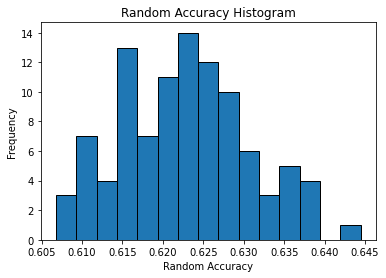

In [64]:
plt.hist(accuracy_guess,15, edgecolor="black")
plt.xlabel("Random Accuracy")
plt.ylabel("Frequency")
plt.title("Random Accuracy Histogram")

Repeat for precision and recall.


In [65]:
precision_guess = np.zeros(100)
recall_guess = np.zeros(100);
for i in range(100):
  randIndx = np.arange(np.size(y_test))
  np.random.shuffle(randIndx)

  random_pred = y_train[randIndx]
  precision_guess[i] = np.sum((random_pred==1) & (y_test==1))/np.sum(random_pred);
  recall_guess[i] = np.sum((random_pred==1) & (y_test==1))/np.sum(y_test);

recall_guess, precision_guess

(array([0.25099602, 0.24966799, 0.25232404, 0.26826029, 0.24037185,
        0.26029216, 0.2310757 , 0.24169987, 0.27091633, 0.26029216,
        0.26162019, 0.26826029, 0.26560425, 0.26958831, 0.24568393,
        0.24833997, 0.26958831, 0.24568393, 0.26826029, 0.26693227,
        0.27622842, 0.24435591, 0.26029216, 0.26693227, 0.22177955,
        0.2377158 , 0.26029216, 0.25498008, 0.24701195, 0.22576361,
        0.27357238, 0.24302789, 0.23904382, 0.25896414, 0.28818061,
        0.25232404, 0.2563081 , 0.25763612, 0.24169987, 0.2815405 ,
        0.25099602, 0.25896414, 0.2310757 , 0.27091633, 0.26029216,
        0.26294821, 0.2377158 , 0.24833997, 0.25099602, 0.24833997,
        0.24302789, 0.25099602, 0.26427623, 0.24435591, 0.23904382,
        0.2563081 , 0.24701195, 0.26826029, 0.23240372, 0.26826029,
        0.26427623, 0.26029216, 0.2563081 , 0.26162019, 0.24169987,
        0.28419655, 0.25232404, 0.28021248, 0.24966799, 0.24966799,
        0.27091633, 0.26029216, 0.24833997, 0.23

In [66]:
np.mean(precision_guess)

0.24844155844155846

Text(0.5, 1.0, 'Random Precision Histogram')

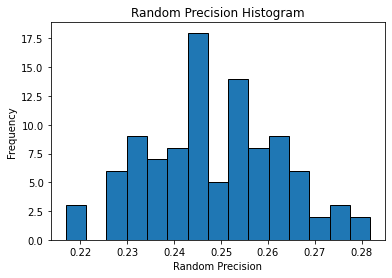

In [67]:
plt.hist(precision_guess,15, edgecolor="black")
plt.xlabel("Random Precision")
plt.ylabel("Frequency")
plt.title("Random Precision Histogram")

In [68]:
np.mean(recall_guess)

0.25405046480743687

Text(0.5, 1.0, 'Random Recall Histogram')

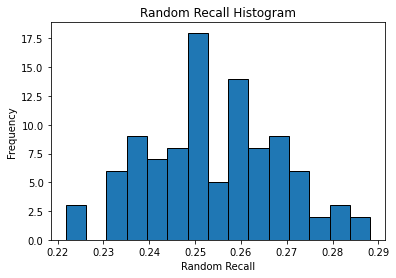

In [69]:
plt.hist(recall_guess,15, edgecolor="black")
plt.xlabel("Random Recall")
plt.ylabel("Frequency")
plt.title("Random Recall Histogram")